# Análisis exploratorio de datos del robo de vehiculos en Jalisco

Este es un análisis exploratorio de datos del robo de autos en Jalisco del 2015 al 2021. El análisis es breve debido a las pocas variables con las que se puede trabajar en este dataset: dos variables continuas (Año y Mes), 2 variables categóricas (Municipio y Subtipo de delito) y una variable discreta (Carpetas).

## Contenido
1. Fuentes de datos
2. Descripción de los datos
3. Limpieza de datos
4. Visualización de datos
5. Referencias

## 1. Fuentes de datos

Para este ejercicio los datos se obtuvieron del Instituto de Información Estadística y Geográfica del estado de Jalisco. https://iieg.gob.mx/

Los datos utilizados son estructurados, aunque como se platicó en el README el proyecto para la Tesis es una red neuronal para leer las matriculas de los vehículos en circulación el cual utiliza datos no estucturados (videos e imagemes)


In [1]:
# Import libraries
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv('./data/Jalisco-Delitos-septiembre-2021.csv', encoding='latin-1')


## 2. Descripción de los datos

In [3]:
df.info() #Datos generales del Dataframe como el total de filas y de columnas, nombre, tipo y no-nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037232 entries, 0 to 1037231
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Año                     1037232 non-null  int64  
 1   Cve..Municipio          1037232 non-null  int64  
 2   Municipio               1037232 non-null  object 
 3   Bien.jurídico.afectado  1037232 non-null  object 
 4   Tipo.de.delito          1037232 non-null  object 
 5   Subtipo.de.delito       1037232 non-null  object 
 6   Modalidad               1037232 non-null  object 
 7   Mes                     1037232 non-null  object 
 8   Carpetas                1000188 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 71.2+ MB


In [4]:
# Variables o Columnas
df.columns

Index(['Año', 'Cve..Municipio', 'Municipio', 'Bien.jurídico.afectado',
       'Tipo.de.delito', 'Subtipo.de.delito', 'Modalidad', 'Mes', 'Carpetas'],
      dtype='object')

In [5]:
df.head() #Observamos las primeras 5 lieneas de nuestro dataframe

,Año,Cve..Municipio,Municipio,Bien.jurídico.afectado,Tipo.de.delito,Subtipo.de.delito,Modalidad,Mes,Carpetas
0,2015,14001,Acatic,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,0.0
1,2015,14001,Acatic,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,0.0
2,2015,14001,Acatic,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,0.0
3,2015,14001,Acatic,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,0.0
4,2015,14001,Acatic,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0.0


In [6]:
df.tail() #Observamos las últimas 5 lineas de nuetro dataframe

,Año,Cve..Municipio,Municipio,Bien.jurídico.afectado,Tipo.de.delito,Subtipo.de.delito,Modalidad,Mes,Carpetas
1037227,2021,14998,No Especificado,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,Diciembre,NaN
1037228,2021,14998,No Especificado,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,Diciembre,NaN
1037229,2021,14998,No Especificado,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Diciembre,NaN
1037230,2021,14998,No Especificado,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,Diciembre,NaN
1037231,2021,14998,No Especificado,Otros bienes jurídicos afectados (del fuero co...,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Diciembre,NaN


### Información general de la base de datos

In [7]:
#Cuantos Municipios diferentes hay
df.Municipio.nunique()

126

In [8]:
#Cuales son los 126 Municipios
df['Municipio'].unique()

array(['Acatic', 'Acatlán de Juárez', 'Ahualulco de Mercado', 'Amacueca',
       'Amatitán', 'Ameca', 'San Juanito de Escobedo', 'Arandas',
       'El Arenal', 'Atemajac de Brizuela', 'Atengo', 'Atenguillo',
       'Atotonilco el Alto', 'Atoyac', 'Autlán de Navarro', 'Ayotlán',
       'Ayutla', 'La Barca', 'Bolaños', 'Cabo Corrientes',
       'Casimiro Castillo', 'Cihuatlán', 'Zapotlán el Grande', 'Cocula',
       'Colotlán', 'Concepción de Buenos Aires',
       'Cuautitlán de García Barragán', 'Cuautla', 'Cuquío', 'Chapala',
       'Chimaltitán', 'Chiquilistlán', 'Degollado', 'Ejutla',
       'Encarnación de Díaz', 'Etzatlán', 'El Grullo', 'Guachinango',
       'Guadalajara', 'Hostotipaquillo', 'Huejúcar',
       'Huejuquilla el Alto', 'La Huerta',
       'Ixtlahuacán de los Membrillos', 'Ixtlahuacán del Río',
       'Jalostotitlán', 'Jamay', 'Jesús María', 'Jilotlán de los Dolores',
       'Jocotepec', 'Juanacatlán', 'Juchitlán', 'Lagos de Moreno',
       'El Limón', 'Magdalena', 'Sa

In [9]:
#Cuales son los tipos de delitos.
df['Tipo.de.delito'].unique()

array(['Homicidio', 'Lesiones', 'Feminicidio', 'Aborto',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Secuestro', 'Tráfico de menores', 'Rapto',
       'Otros delitos que atentan contra la libertad personal',
       'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual',
       'Violación simple', 'Violación equiparada', 'Incesto',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Robo', 'Fraude', 'Abuso de confianza', 'Extorsión',
       'Daño a la propiedad', 'Despojo',
       'Otros delitos contra el patrimonio', 'Violencia familiar',
       'Violencia de género en todas sus modalidades distinta a la violencia familiar',
       'Incumplimiento de obligaciones de asistencia familiar',
       'Otros delitos contra la familia', 'Corrupción de menores',
       'Trata de personas', 'Otros delitos contra la sociedad',
       'Narcomenudeo', 'Amenazas', 'Allanamiento de morada',
       'Evasión de presos', 'Falsedad'

In [10]:
#Cuales son todos los Subtipos de delitos que hay. Queremos ver el Subtipo de delito que nos interesa. En este caso es el robo de vehículos
df['Subtipo.de.delito'].unique()

array(['Homicidio doloso', 'Homicidio culposo', 'Lesiones dolosas',
       'Lesiones culposas', 'Feminicidio', 'Aborto',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Secuestro', 'Tráfico de menores', 'Rapto',
       'Otros delitos que atentan contra la libertad personal',
       'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual',
       'Violación simple', 'Violación equiparada', 'Incesto',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Robo a casa habitación', 'Robo de vehículo automotor',
       'Robo de autopartes', 'Robo a transportista',
       'Robo a transeúnte en vía pública',
       'Robo a transeúnte en espacio abierto al público',
       'Robo en transporte público individual',
       'Robo en transporte público colectivo',
       'Robo en transporte individual', 'Robo a institución bancaria',
       'Robo a negocio', 'Robo de ganado', 'Robo de maquinaria',
       'Otros robos', 'Fraude', 'Abuso

In [11]:
#Creamos un nuevo Dataframe que contenga solo las filas que nos interesa: Robo de vehículos automotor
df_vehiculos = df[df['Subtipo.de.delito'] == 'Robo de vehículo automotor']
df_vehiculos.head()

,Año,Cve..Municipio,Municipio,Bien.jurídico.afectado,Tipo.de.delito,Subtipo.de.delito,Modalidad,Mes,Carpetas
41,2015,14001,Acatic,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,Enero,0.0
42,2015,14001,Acatic,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,Enero,0.0
43,2015,14001,Acatic,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,Enero,0.0
44,2015,14001,Acatic,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,Enero,1.0
45,2015,14001,Acatic,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,Enero,0.0


## 3. Limpieza de Datos y Missing Values

La columna 'Carpetas' contiene la cantidad de delitos que se reportaron para ese delito en ese Año, Mes , Municipio. 
Por lo que si el valor es 0 o Nulo no tiene sentido conservar esa fila y la vamos a descartar.

In [34]:
df_vehiculos = df_vehiculos.dropna(subset=['Carpetas'])   # Eliminamos las filas con valores nulos en la columna 'Carpetas'   (MISSING VALUES)
df_vehiculos = df_vehiculos[df_vehiculos['Carpetas'] != 0]          # Eliminamos las filas con valores = 0 en la columna 'Carpetas'

In [35]:
df_vehiculos.info() #Volvemos a mostrar la informacion genereal de nuestro Dataframe pero ahora solo con las filas de nuestro interés. 
#También vemos que todas las colunas tienen 8828 valores y ya no hay valores nulos o missing values 

<class 'pandas.core.frame.DataFrame'>
Index: 8828 entries, 44 to 1024732
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     8828 non-null   int64  
 1   Cve..Municipio          8828 non-null   int64  
 2   Municipio               8828 non-null   object 
 3   Bien.jurídico.afectado  8828 non-null   object 
 4   Tipo.de.delito          8828 non-null   object 
 5   Subtipo.de.delito       8828 non-null   object 
 6   Modalidad               8828 non-null   object 
 7   Mes                     8828 non-null   object 
 8   Carpetas                8828 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 689.7+ KB


In [14]:
 #Muestra la cantidad de valores únicos por columna. Por ejemplo podemos ver que en Jalisco hay 126 municipios y que hay 12 Meses. 
df_vehiculos.nunique() 

Año                         7
Cve..Municipio            124
Municipio                 124
Bien.jurídico.afectado      1
Tipo.de.delito              1
Subtipo.de.delito           1
Modalidad                   4
Mes                        12
Carpetas                  263
dtype: int64

In [15]:
df_vehiculos.Modalidad.unique() #Diferentes tipos de modalidades de robo

array(['Robo de motocicleta Sin violencia',
       'Robo de coche de 4 ruedas Sin violencia',
       'Robo de motocicleta Con violencia',
       'Robo de coche de 4 ruedas Con violencia'], dtype=object)

## 4. Visualización de datos

#### Total de vehiculos robados por año

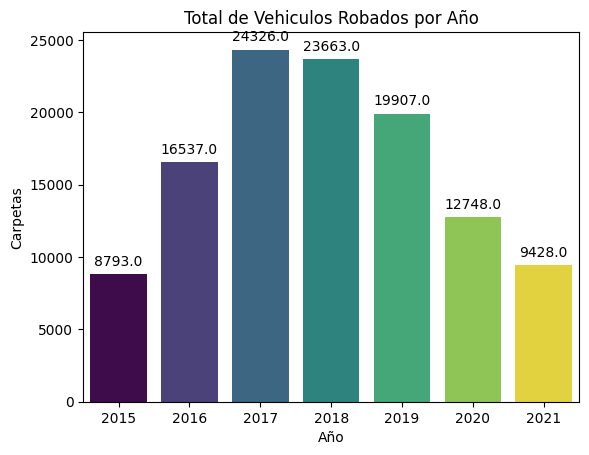

In [16]:
#splot = sns.barplot(df_vehiculos.groupby('Año')['Carpetas'].sum(),palette='viridis')
splot = sns.barplot(x='Año', y='Carpetas', data = df_vehiculos, estimator=sum, errorbar=('ci', False),palette='viridis', hue = 'Año',legend=False)
plt.title('Total de Vehiculos Robados por Año');

#Este ciclo for muestra los valores encima de cada barra
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')


#### Gráfica para mostrar las modalidades de robo más frecunetes

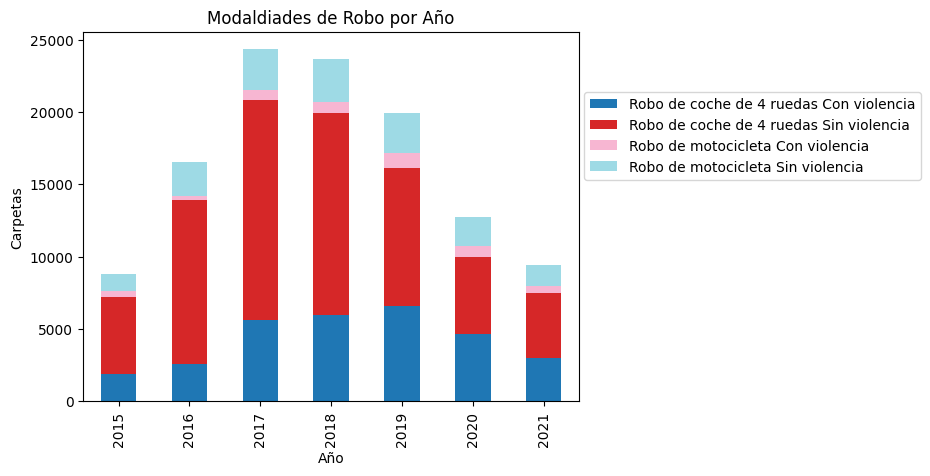

In [17]:
df_pivot = pd.pivot_table(df_vehiculos, index='Año', columns='Modalidad', values='Carpetas', aggfunc='sum')
df_pivot.plot.bar(stacked=True, colormap='tab20')
plt.ylabel('Carpetas')
plt.title('Modaldiades de Robo por Año')
plt.legend(loc=(1.01,0.6));

#### Total de robos por Modalidad

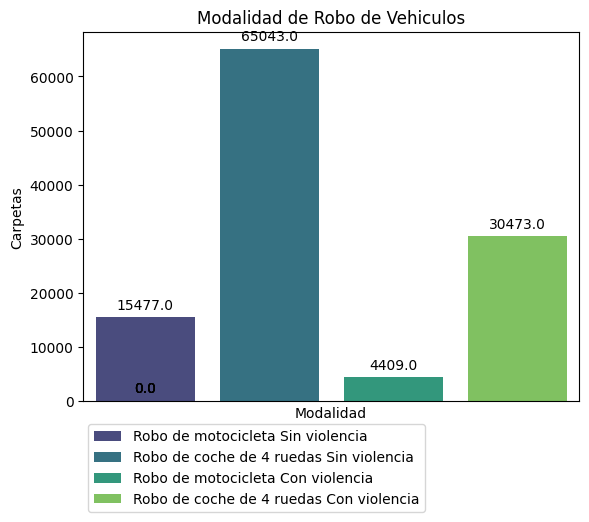

In [18]:
splot = sns.barplot(x='Modalidad', y='Carpetas', data = df_vehiculos, estimator=sum, errorbar=('ci', False),palette='viridis', hue = 'Modalidad', legend=True)
plt.title('Modalidad de Robo de Vehiculos')
plt.legend(loc=(.01,-0.3))
plt.xticks([]) ;

#Este ciclo for muestra los valores encima de cada barra
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

#### Meses en los que mas ocurren robos de vehiculos (2015-2021)

C:\Users\joherrer\AppData\Local\Temp\ipykernel_17116\4217354073.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  splot = sns.barplot(df_vehiculos.groupby('Mes')['Carpetas'].sum().sort_values(ascending=False), palette='viridis')


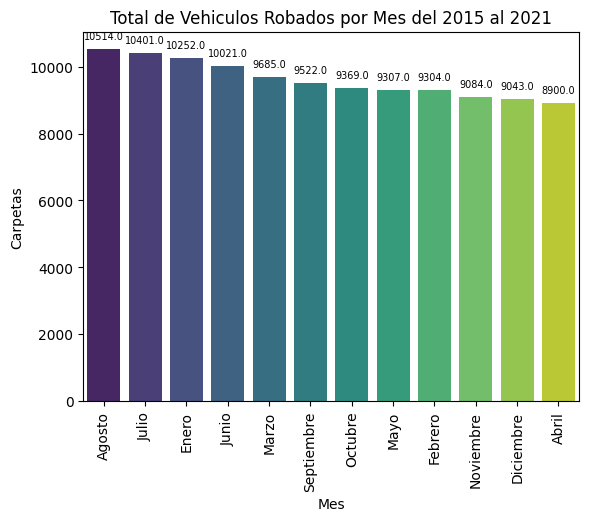

In [33]:
splot = sns.barplot(df_vehiculos.groupby('Mes')['Carpetas'].sum().sort_values(ascending=False), palette='viridis')
#splot = sns.barplot(x='Mes', y='Carpetas', data = df_vehiculos, estimator=sum, errorbar=('ci', False),palette='viridis', hue = 'Mes',legend=False)
plt.title('Total de Vehiculos Robados por Mes del 2015 al 2021');
plt.xticks(rotation='vertical');

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',  size=7,
                   xytext = (0, 9),
                   textcoords = 'offset points')

#### Municipios con mas robos de vehiculos (2015-2021)

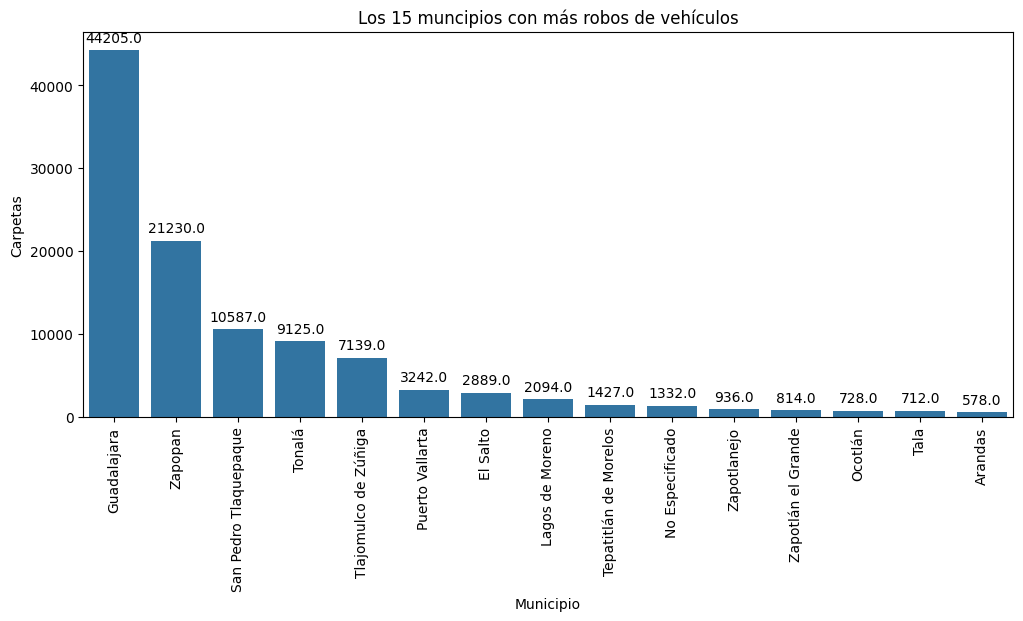

In [20]:
plt.figure(figsize=(12,5))
splot = sns.barplot(df_vehiculos.groupby('Municipio')['Carpetas'].sum().sort_values(ascending=False).head(15) )
plt.title('Los 15 muncipios con más robos de vehículos')
plt.xticks(rotation='vertical');

#Este ciclo for muestra los valores encima de cada barra
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')


#### Municipios con menos robos de vehiculos (2015-2021)

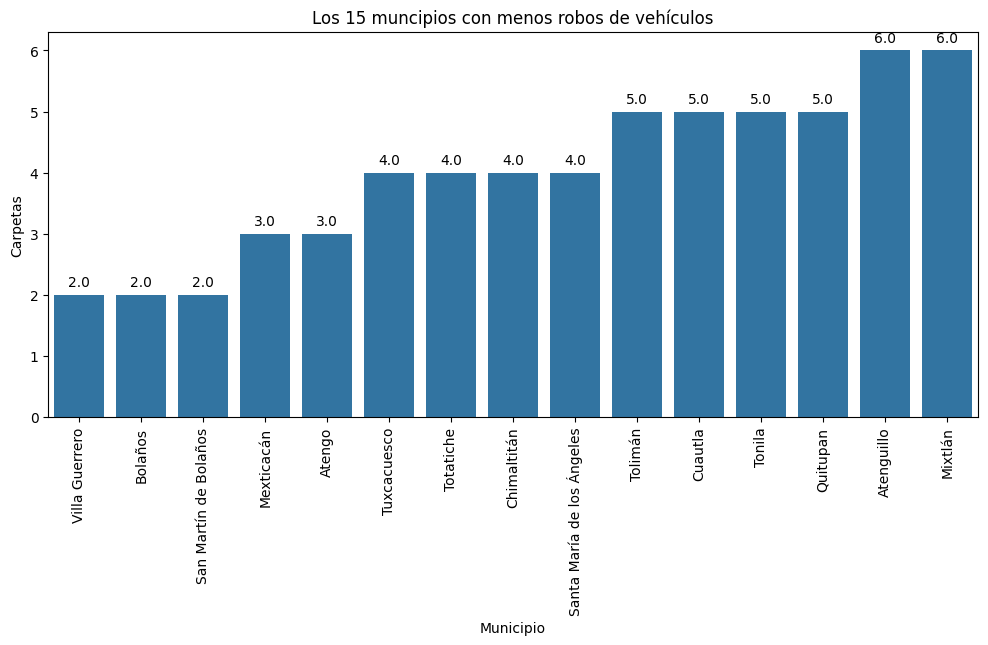

In [37]:
plt.figure(figsize=(12,5))
splot = sns.barplot(df_vehiculos.groupby('Municipio')['Carpetas'].sum().sort_values(ascending=True).head(15) )
plt.title('Los 15 muncipios con menos robos de vehículos')
plt.xticks(rotation='vertical');

#Este ciclo for muestra los valores encima de cada barra
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

# 6. Referencias

Instituto de Información Estadística y Geográfica del estado de Jalisco. https://iieg.gob.mx/